## Tools
* Playlist analyzer: https://www.chosic.com/spotify-playlist-analyzer/
* BPM tool: https://www.all8.com/tools/bpm.htm

I pasted the spotify playlist links into the playlist analyzer, and downloaded the `.csv` at the bottom

In [26]:
!pip install polars hvplot altair --upgrade
import polars as pl
import hvplot.polars
import os
import matplotlib as plt
import altair

df = pl.read_csv('Playlists/good_2024.09.13 Bavarian Open.csv')
df

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.1/658.1 kB 2.5 MB/s eta 0:00:00-:--:--


#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud (Db),Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,ISRC
i64,str,str,i64,i64,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,str,str,str,str
1,"""Borderline""","""Jordan Rakei""",52,92,"""indie soul, neo r&b""","""R&B""","""Origin (Deluxe Edition)""","""2020-03-13""","""04:15""",55,60,34,0,23,0,0,-7,"""F Major""",4,"""2024-09-14""","""5rcGQIrv6eUIyCBfWga363""","""Ninja Tune""","""7B""","""GBCFB2000077"""
2,"""California King""","""D.B. Ricapito""",29,172,"""""","""""","""California King""","""2018-01-12""","""03:15""",67,52,57,0,72,0,10,-6,"""E Minor""",4,"""2024-09-14""","""180OrhCzFdX7Pyhri6AerI""","""Cheiron Records""","""9A""","""uscgh1812192"""
3,"""Marvins Room""","""Conor Maynard""",19,171,"""post-teen pop, talent show, uk…","""Pop""","""Vegas Girl""","""2012-07-24""","""03:32""",45,25,95,0,29,0,10,-12,"""F Minor""",3,"""2024-09-14""","""1EjmPUwTvR5UMQ3bPaIVg0""","""Parlophone UK""","""4A""","""GBAYE1200831"""
4,"""On Our Knees (feat. R.O)""","""Konoba,R.O""",47,87,"""belgian pop""","""Pop""","""Smoke & Mirrors""","""2017-01-20""","""04:37""",59,34,86,3,27,0,20,-10,"""C♯/D♭ Minor""",4,"""2024-09-14""","""2HCgcgN4PA0xr2ZqtsBpPb""","""Konoba""","""12A""","""BEDY11500005"""
5,"""Turn the Lights Down""","""Cavalcade""",0,92,"""""","""""","""Turn the Lights Down""","""2015-06-05""","""03:17""",69,41,44,0,27,0,10,-7,"""E Major""",4,"""2024-09-14""","""3z5Eoxhvou4xGesLoAB36h""","""CRS Music Management""","""12B""","""AUW631100716"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
21,"""Testify""","""Robin Thicke""",35,180,"""dance pop, neo soul, pop rap, …","""Pop, R&B, Hip Hop""","""Testify""","""2018-12-12""","""03:20""",67,42,74,0,57,0,10,-9,"""G Major""",4,"""2024-09-14""","""3KUcJryOB8pwkBO3ffzzZD""","""Thicke Music / EMPIRE""","""9B""","""USUYG1230719"""
22,"""Let the Rhythm Just""","""The Polish Ambassador,Ayla Ner…",24,98,"""electropop, glitch hop, folktr…","""Hip Hop, Pop, Folk/Acoustic, E…","""Terra Bella""","""2015-08-07""","""05:55""",82,72,31,0,79,0,0,-7,"""D Major""",4,"""2024-09-14""","""0zgkr1a63fSBG9qQq6Yk1W""","""Jumpsuit Records, Inc.""","""10B""","""USDY41551901"""
23,"""Gone""","""Phlake,Alina Baraz""",37,140,"""danish pop, scandinavian r&b, …","""Pop, R&B""","""Weird Invitations""","""2017-10-06""","""03:34""",51,25,95,0,19,0,10,-10,"""F Minor""",3,"""2024-09-14""","""1bTznoPGxp3ygLTHReQtIh""","""Sony Music Entertainment""","""4A""","""DKADG1700264"""


## Graphing with `hvplot`

In [67]:
for i in sorted(os.listdir('Playlists/')):
    if 'unordered' not in i:
        display((pl.read_csv(f'Playlists/{i}')

                 #correcting spotify's bpm guessing
                 .with_columns(pl.when(pl.col('BPM') >= 135)
                                .then(pl.col('BPM')/2)
                                .when(pl.col('BPM') <= 50)
                                .then(pl.col('BPM')*2)
                                .otherwise(pl.col('BPM')),
                               song = pl.col('Song').str.slice(0,18),
                              )
                 
                 #plot the things
                ).hvplot(x='song', 
                         y=['BPM',  
                            # 'Energy'
                           ], 
                         width=1300, 
                         height=500, 
                         stacked=True,
                         legend='top', 
                         title=i,
                        ).opts(xrotation=90)) #rotating song names
        # break

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

:Curve   [song]   (BPM)

## 😔 Have to use Matplotlib for Github viewing

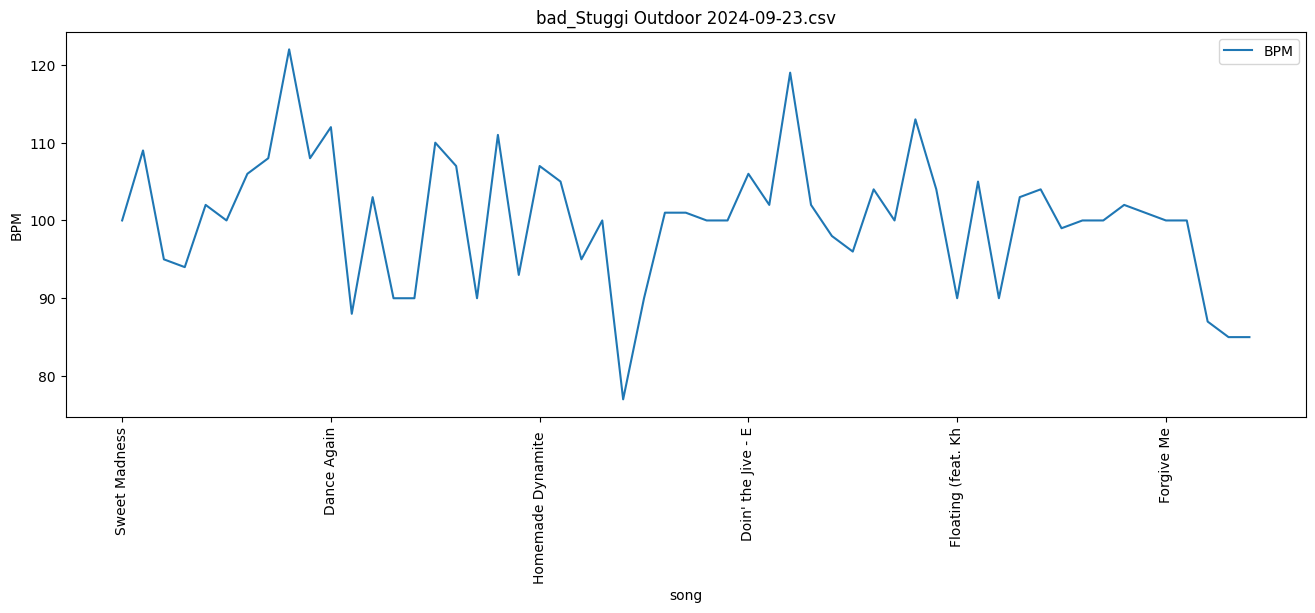

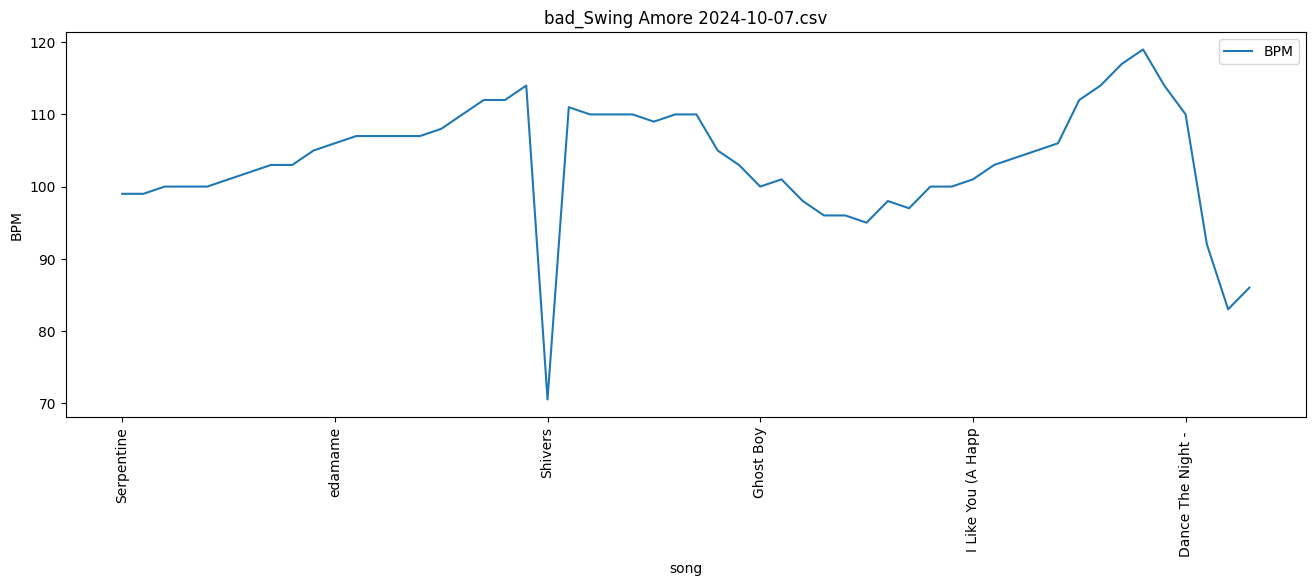

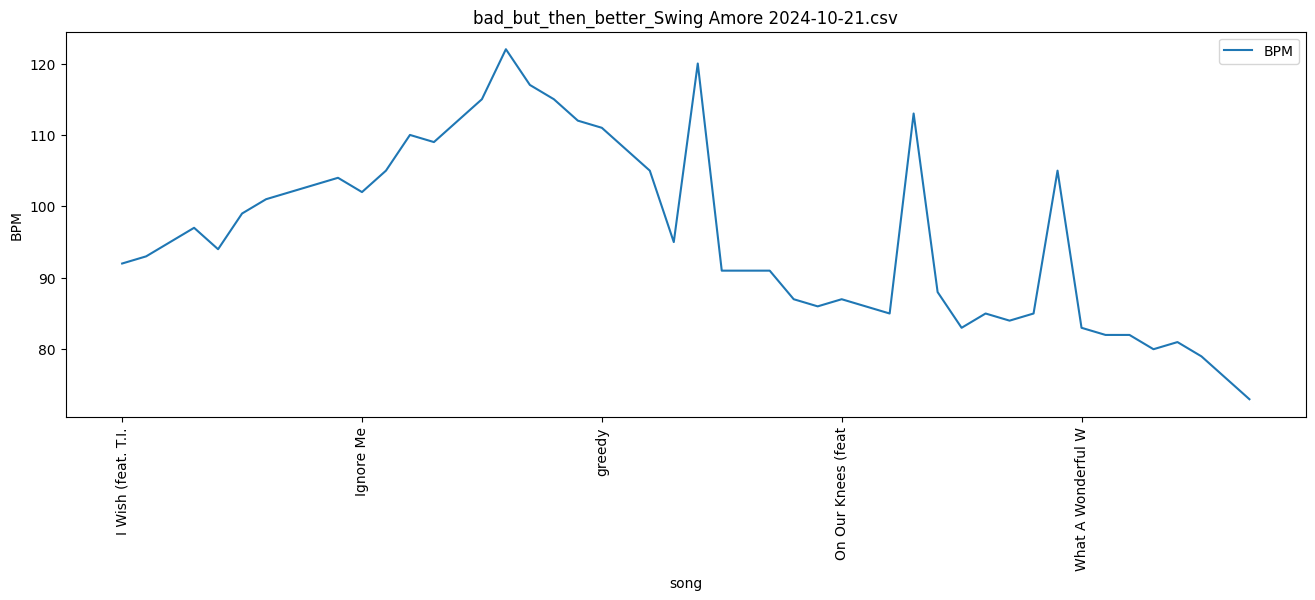

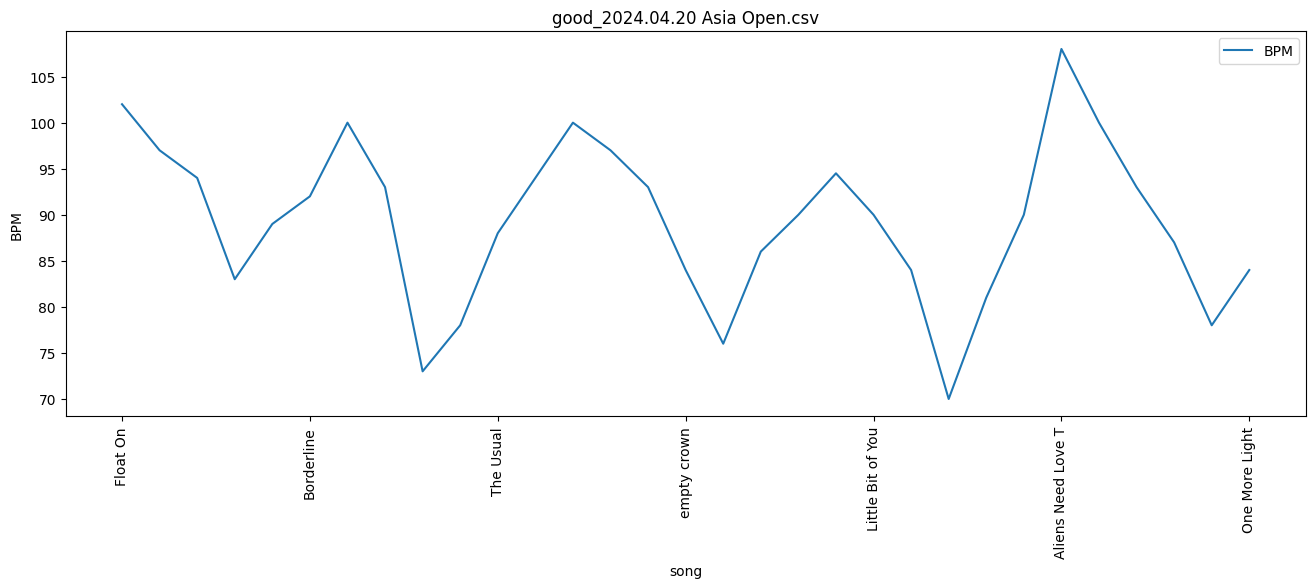

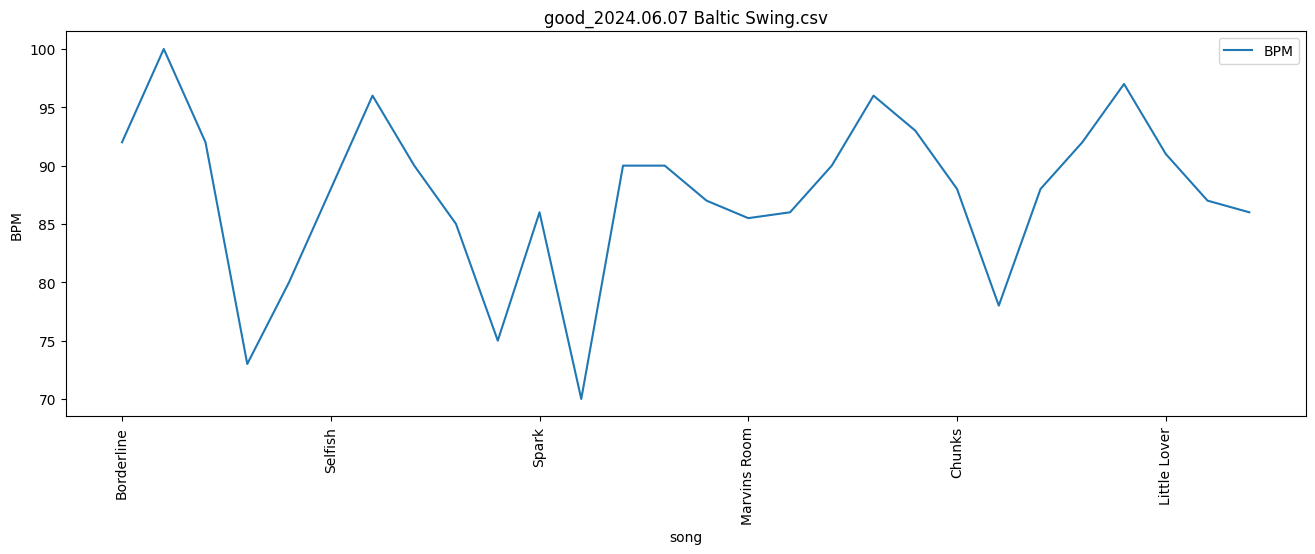

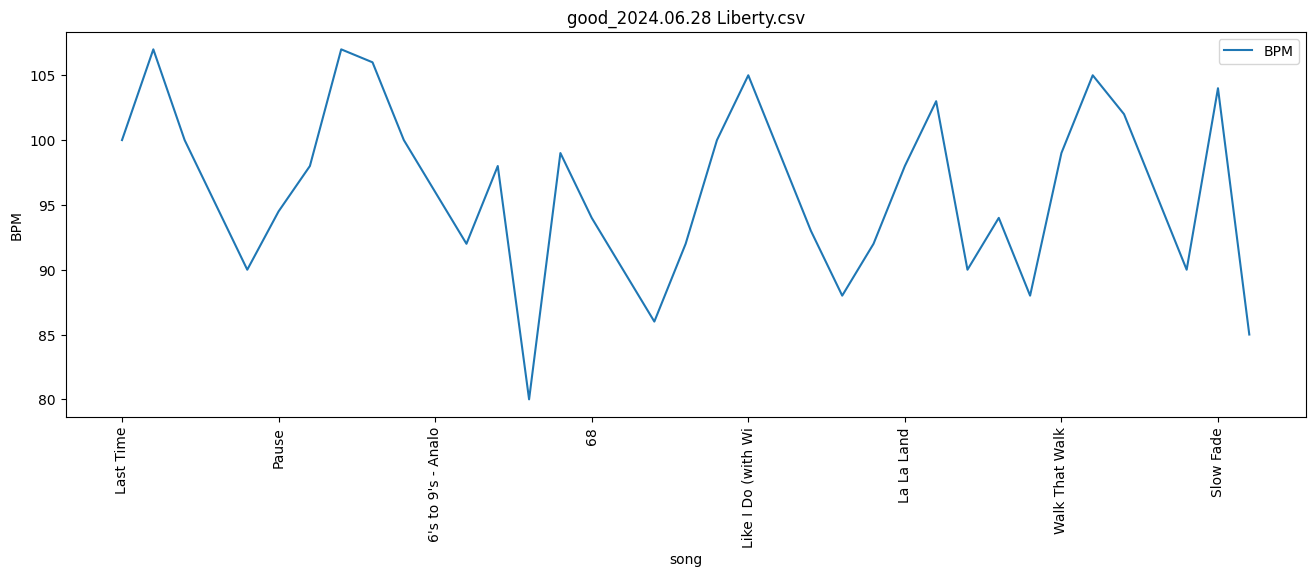

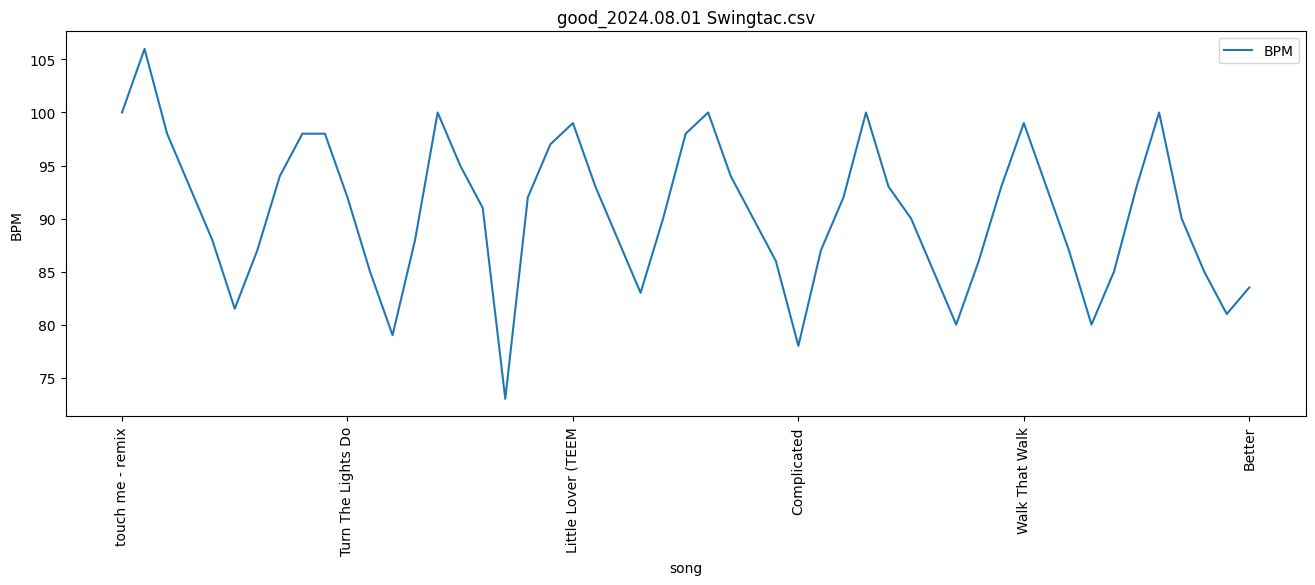

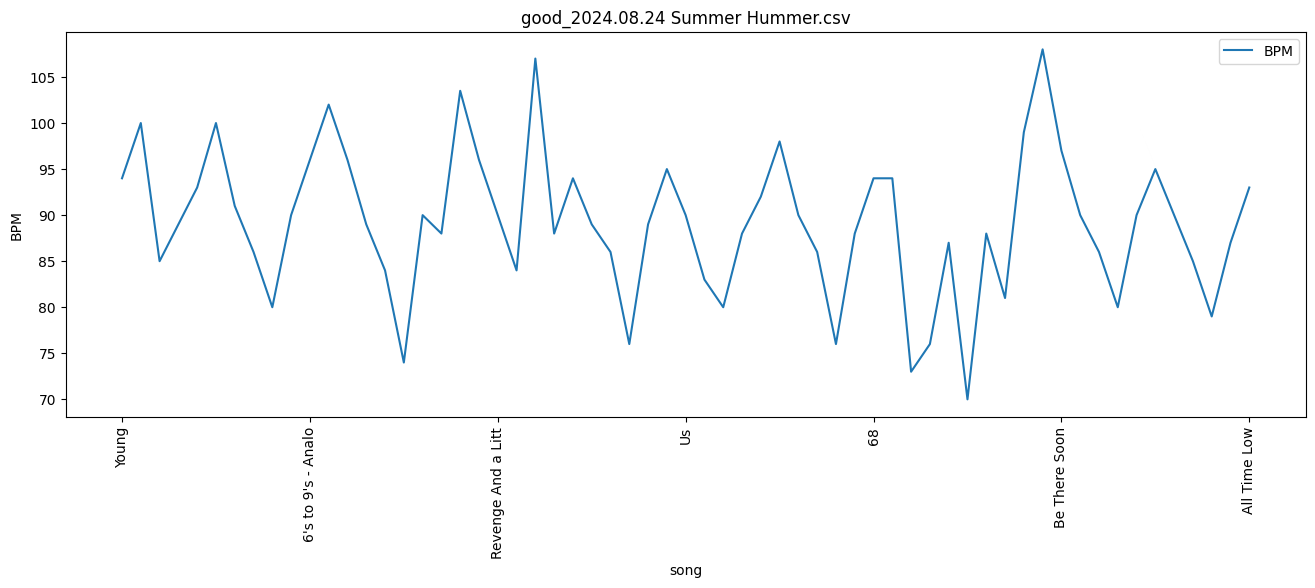

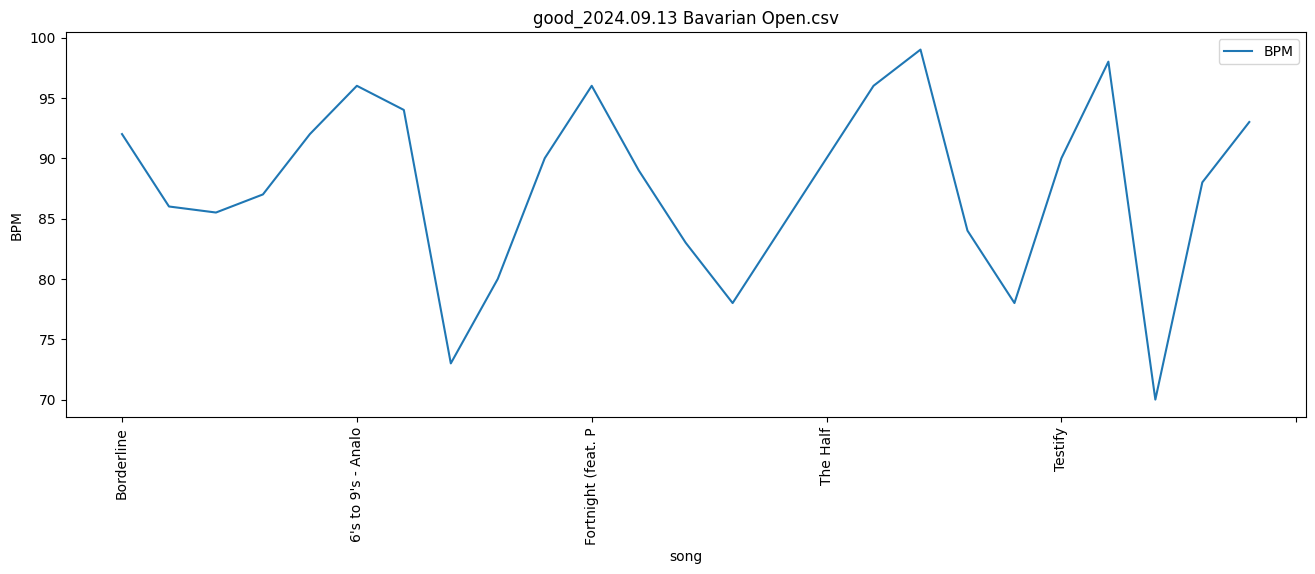

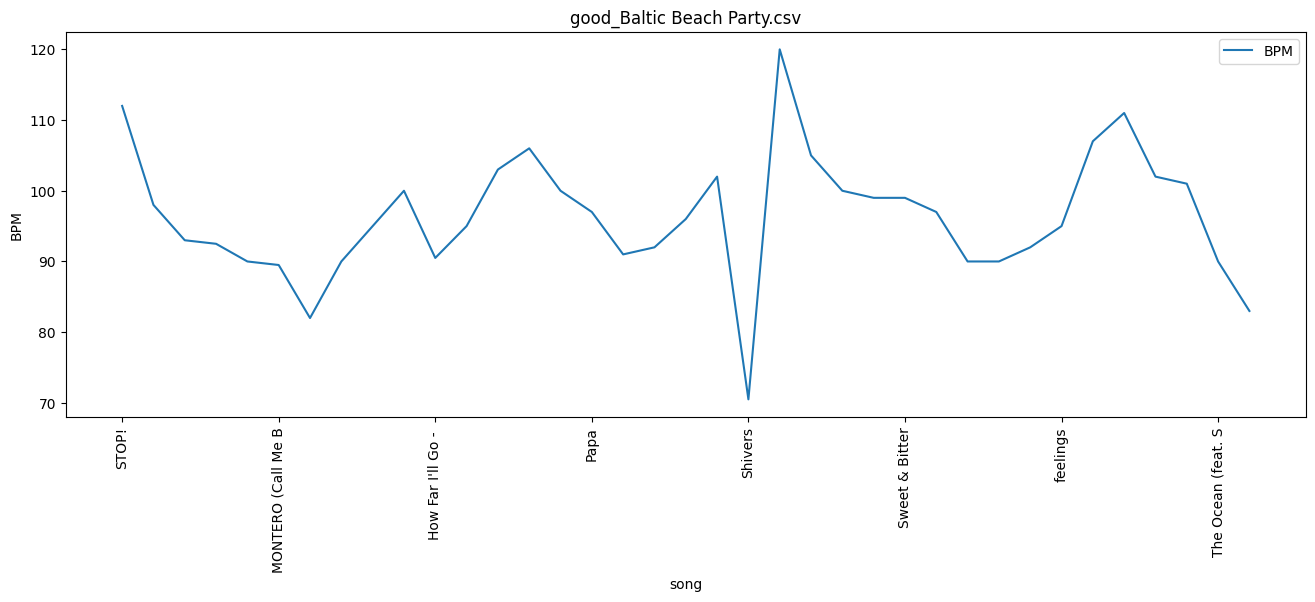

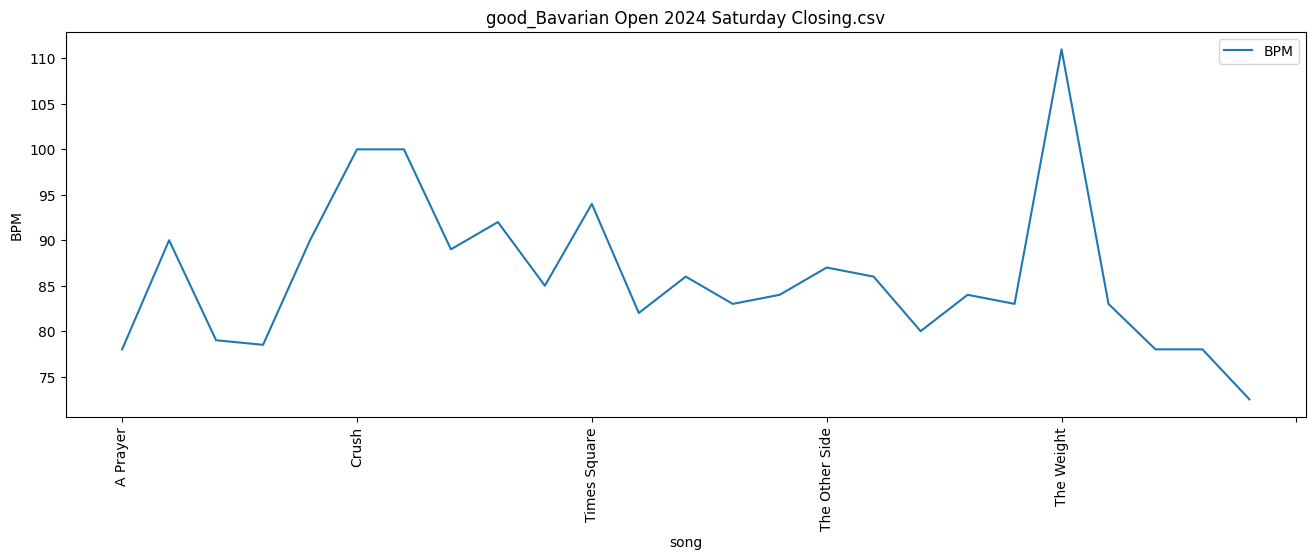

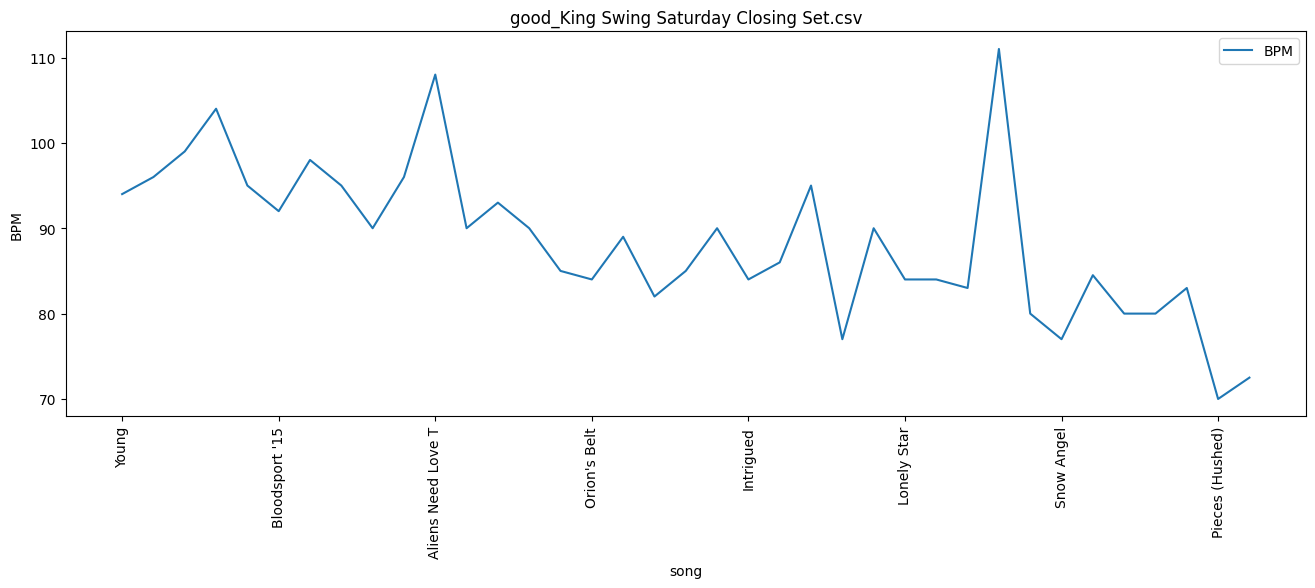

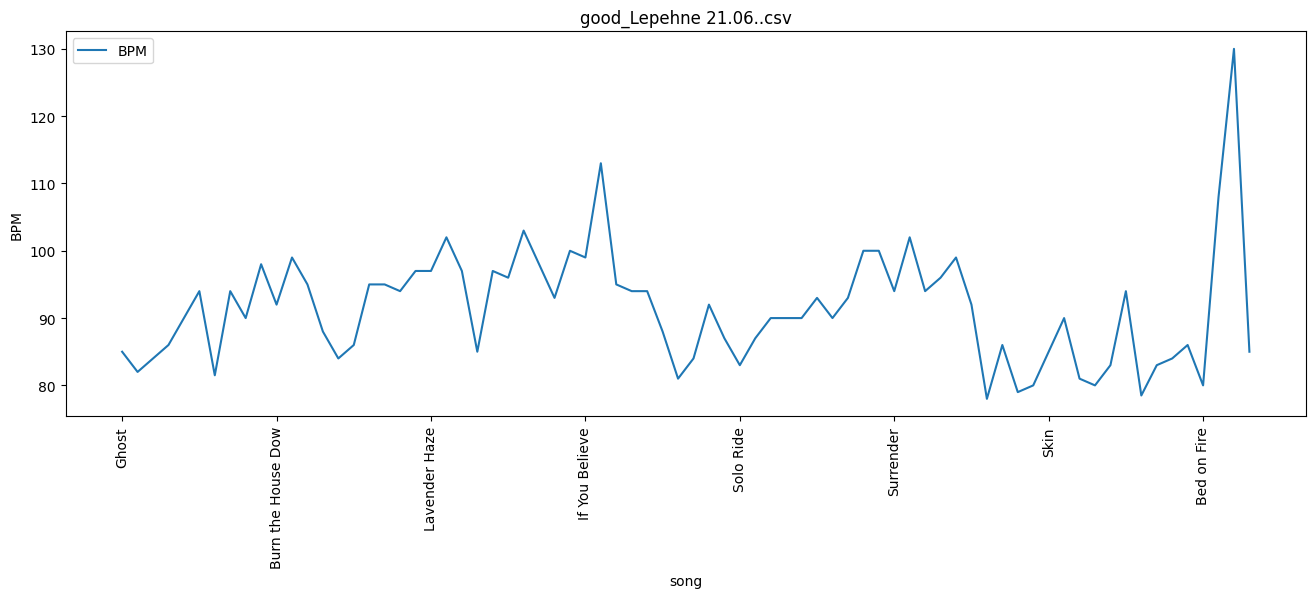

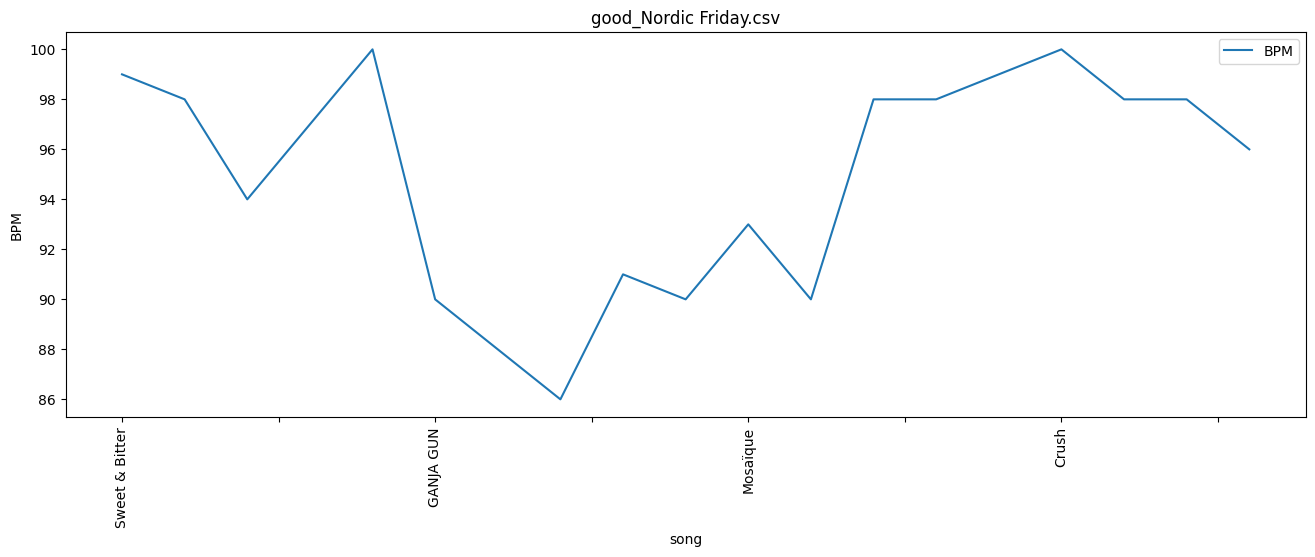

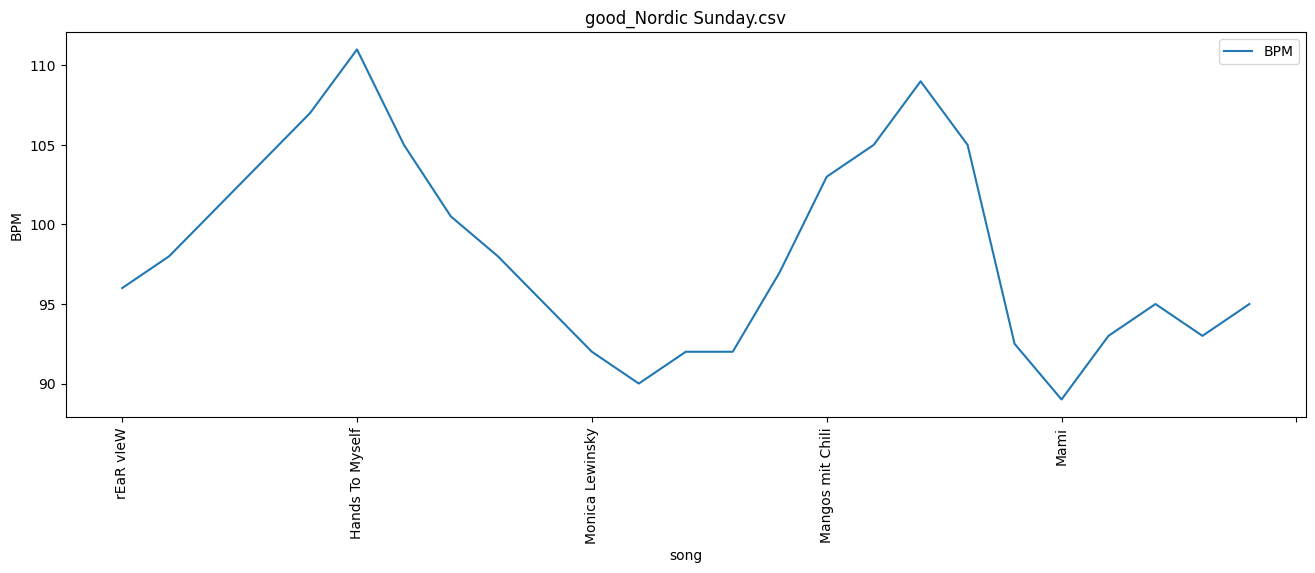

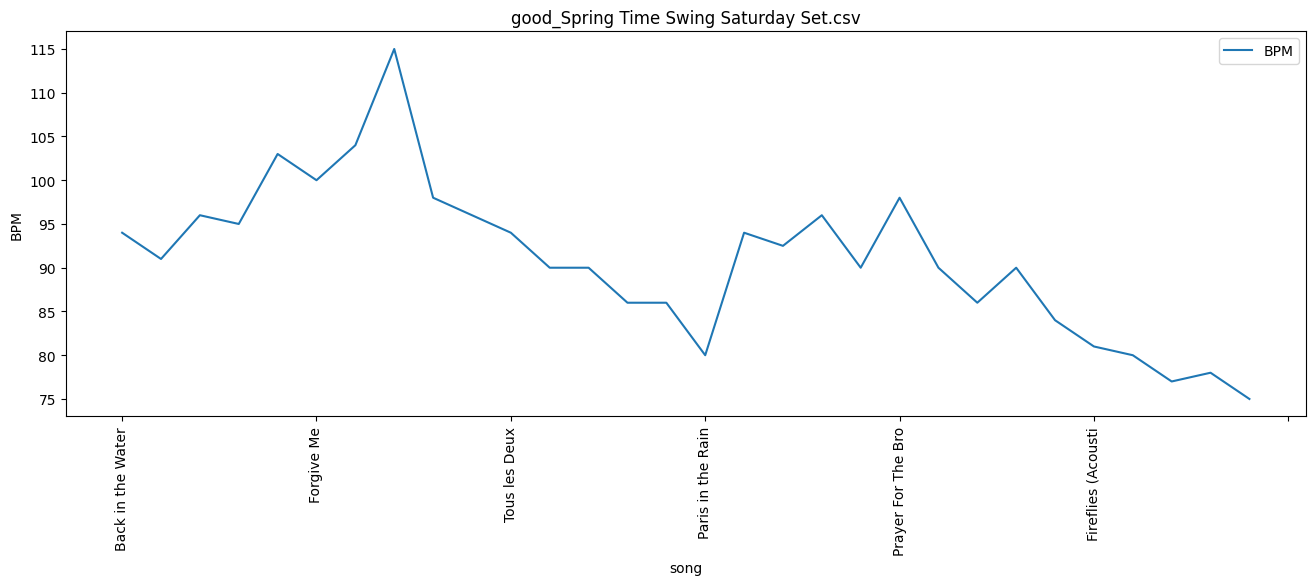

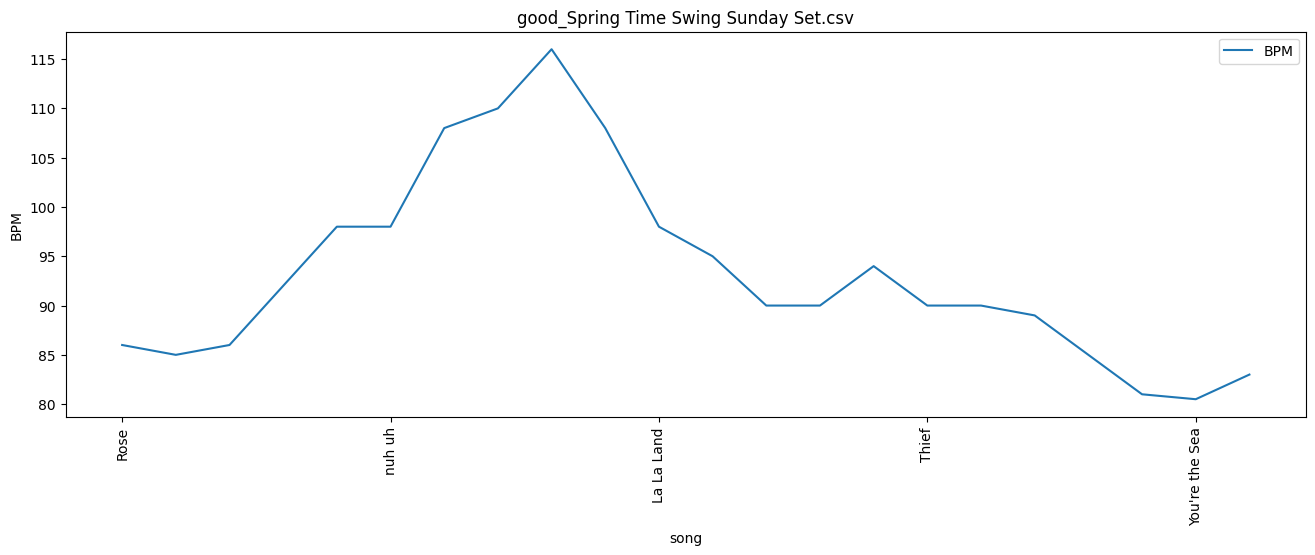

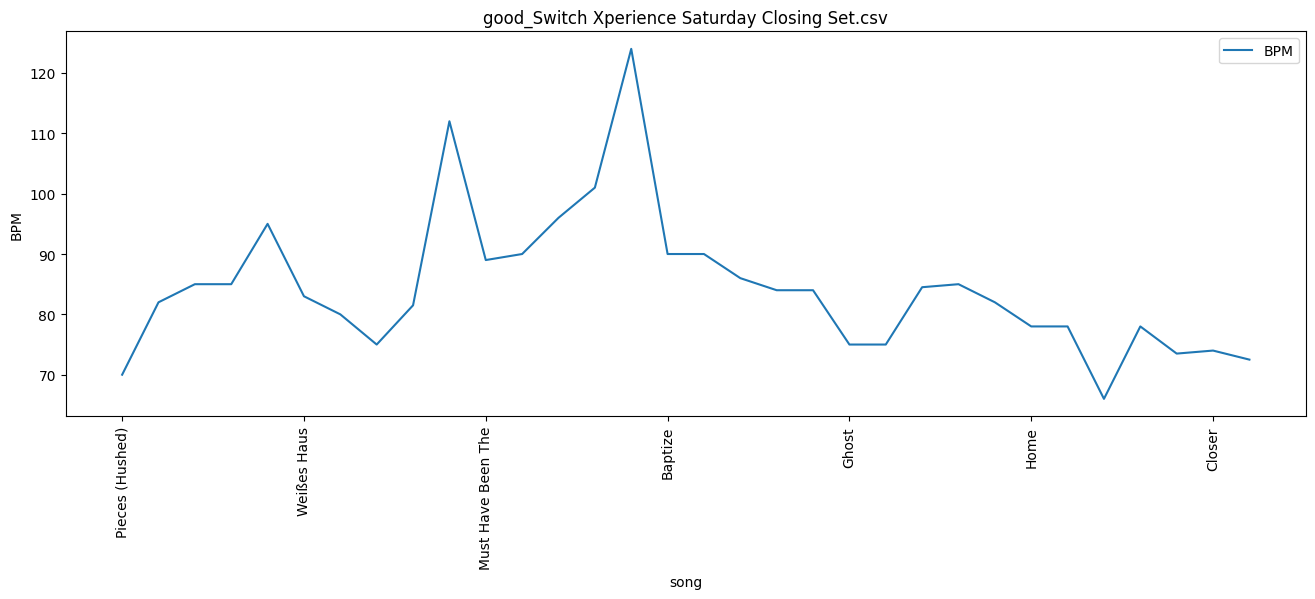

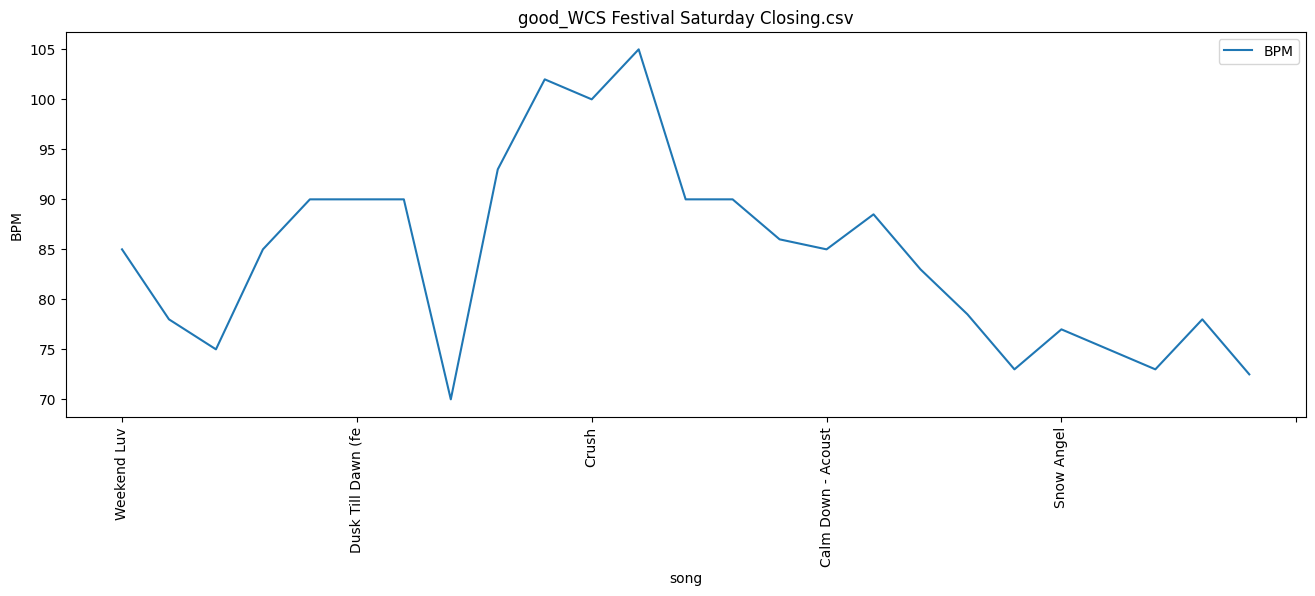

In [69]:
for i in sorted(os.listdir('Playlists/')):
    if 'unordered' not in i:
        ((pl.read_csv(f'Playlists/{i}')
          
         #correcting spotify's bpm guessing
         .with_columns(pl.when(pl.col('BPM') >= 135)
                        .then(pl.col('BPM')/2)
                        .when(pl.col('BPM') <= 50)
                        .then(pl.col('BPM')*2)
                        .otherwise(pl.col('BPM')),
                       song = pl.col('Song').str.slice(0,18),
                      )
         .to_pandas()
          
        #plot the things
        ).plot(x='song', 
               y='BPM', 
               kind='line',
               title=i,
               figsize=(16, 5), 
               legend=True, 
               rot=90, 
               ylabel='BPM',
              )
        )
        # break